In [1]:
import os
import sys
import numpy, pandas, torch
from muzero import MuZero, self_play
import ray

import os
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display

# note xvfb must be installed on the system, ie apt-get install xvfb
display = Display(visible=0, size=(1400, 900))
display.start()

In [4]:
muzero = MuZero('cartpole')
self_play_worker = self_play.SelfPlay.options(
    num_cpus=0, num_gpus=0,
).remote(muzero.checkpoint, muzero.Game, muzero.config, numpy.random.randint(10000))

game_history = ray.get(
    self_play_worker.play_game.remote(
        0, 0, True, muzero.config.opponent, muzero.config.muzero_player, render_history=True
    )
)

2021-04-15 22:49:16,631	INFO worker.py:664 -- Calling ray.init() again after it has already been called.


(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.54
(pid=204549) Played action: 0. Push cart to the left
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.51
(pid=204549) Played action: 0. Push cart to the left
(pid=204549) Tree depth: 5
(pid=204549) Root value for player 0: 0.51
(pid=204549) Played action: 0. Push cart to the left
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.48
(pid=204549) Played action: 0. Push cart to the left
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.48
(pid=204549) Played action: 1. Push cart to the right
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.49
(pid=204549) Played action: 1. Push cart to the right
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.50
(pid=204549) Played action: 1. Push cart to the right
(pid=204549) Tree depth: 6
(pid=204549) Root value for player 0: 0.53
(pid=204549) Played action: 1. Push cart to the right
(pid=204549)

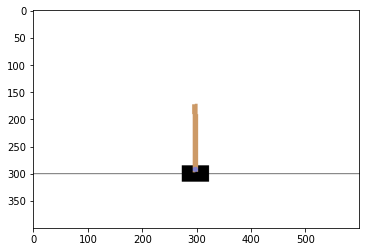

In [5]:
plt.imshow(game_history.render_history[0])

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


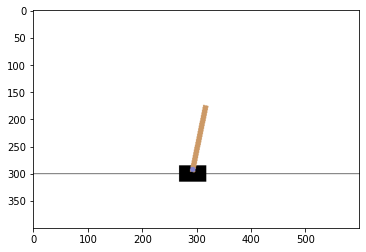

In [6]:
from matplotlib import animation , rc
fig = plt.figure()

frame = []
for img in game_history.render_history:
    img = plt.imshow(img)
    frame.append([img])    

an = animation.ArtistAnimation(fig, frame, interval=100, repeat_delay=1000, blit=True)
rc('animation', html='jshtml')
an